In [3]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
cal_images = glob.glob("calibration/calibration*.jpg")

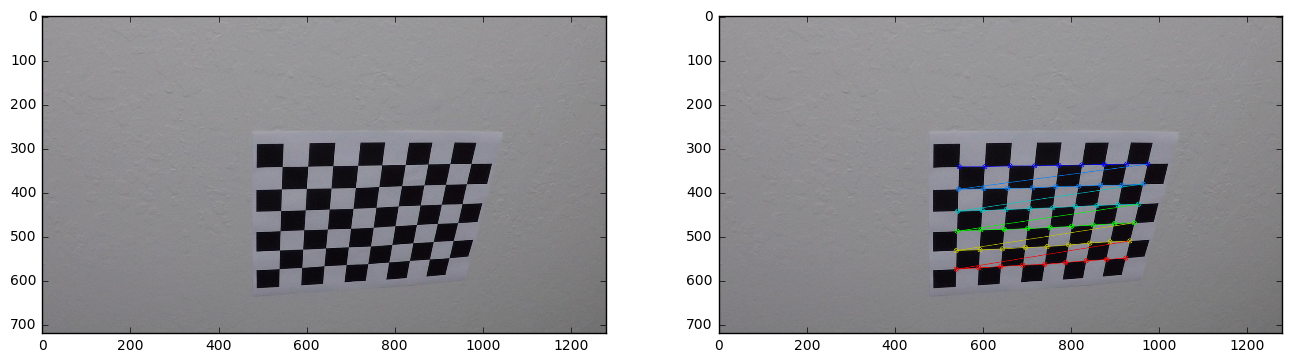

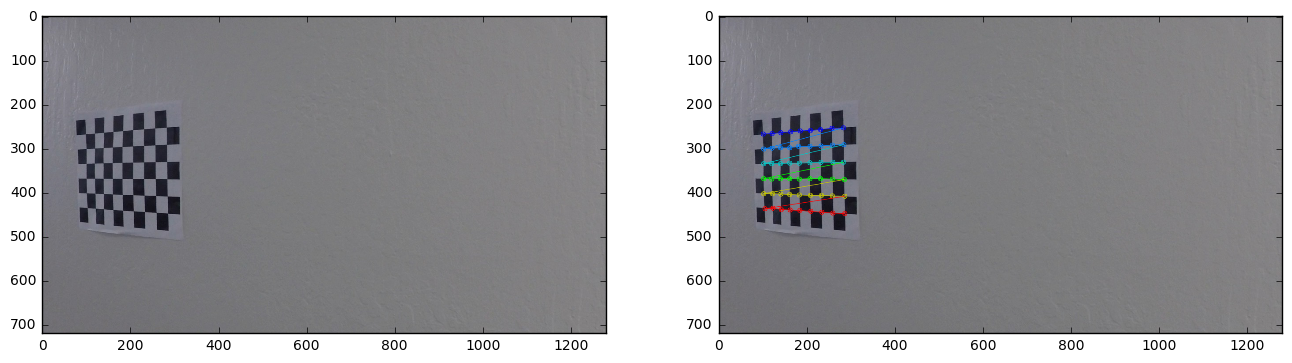

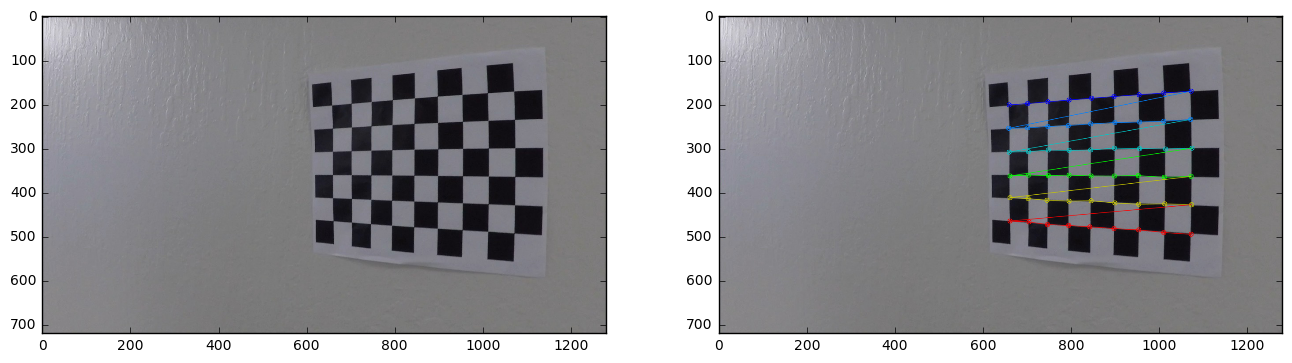

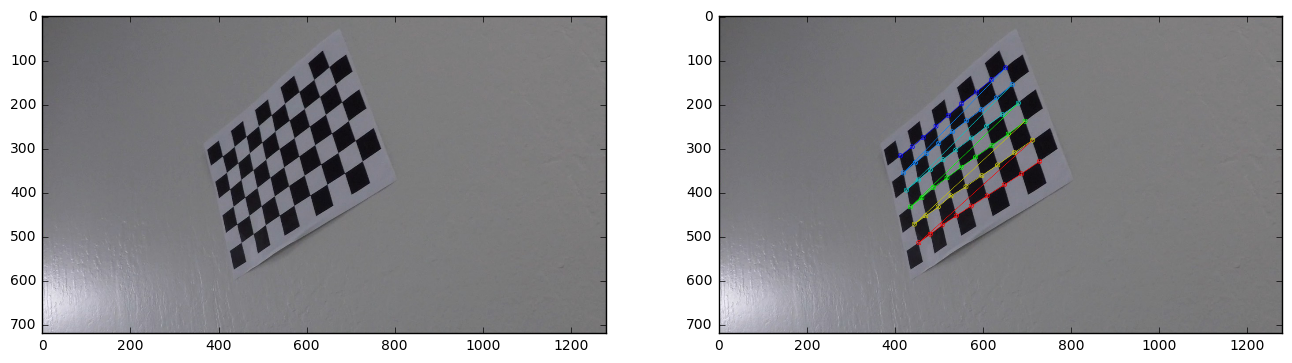

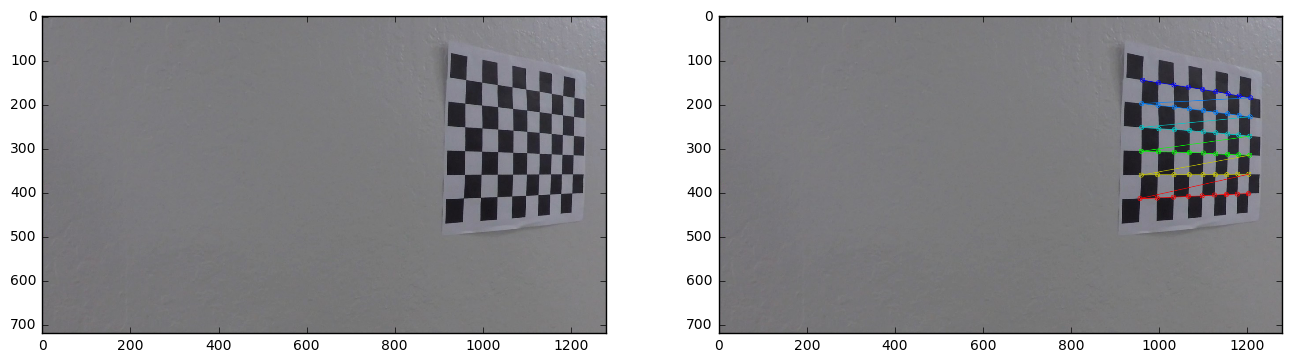

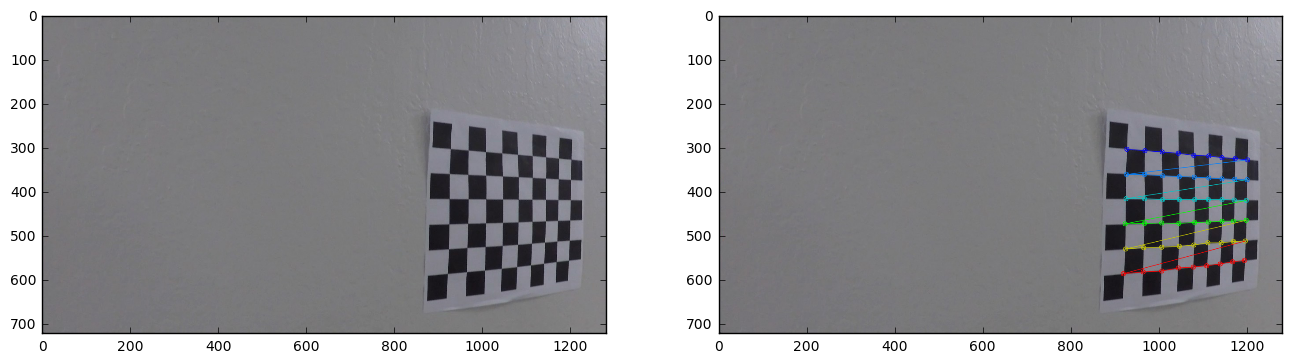

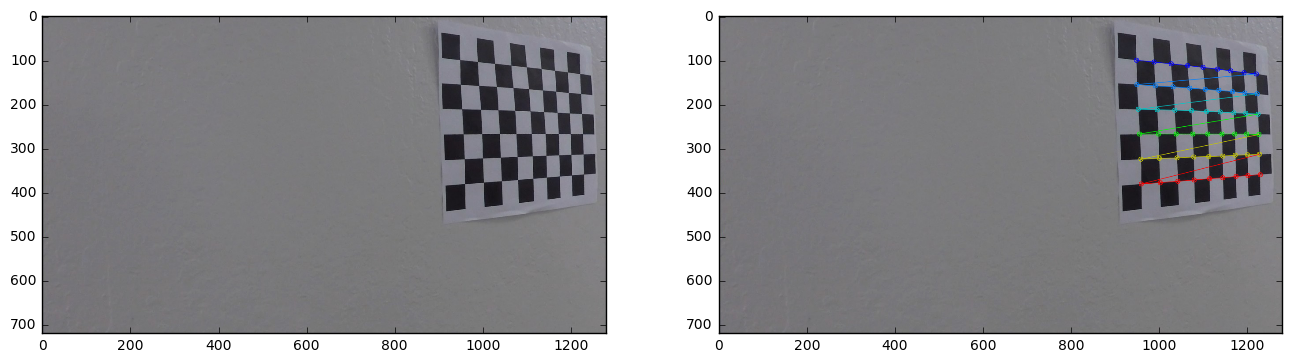

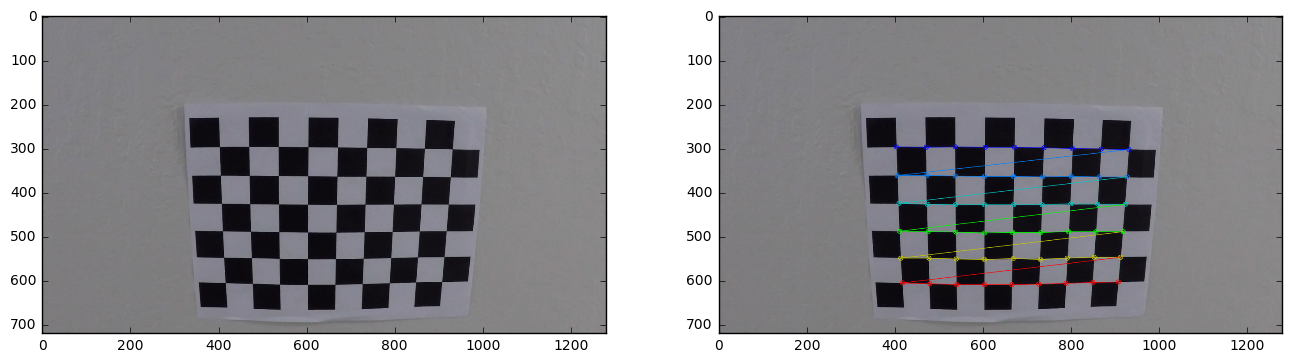

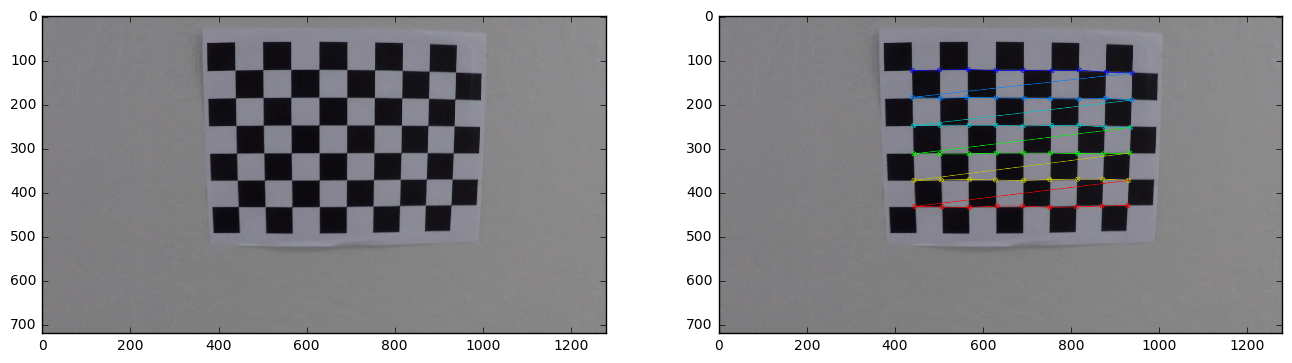

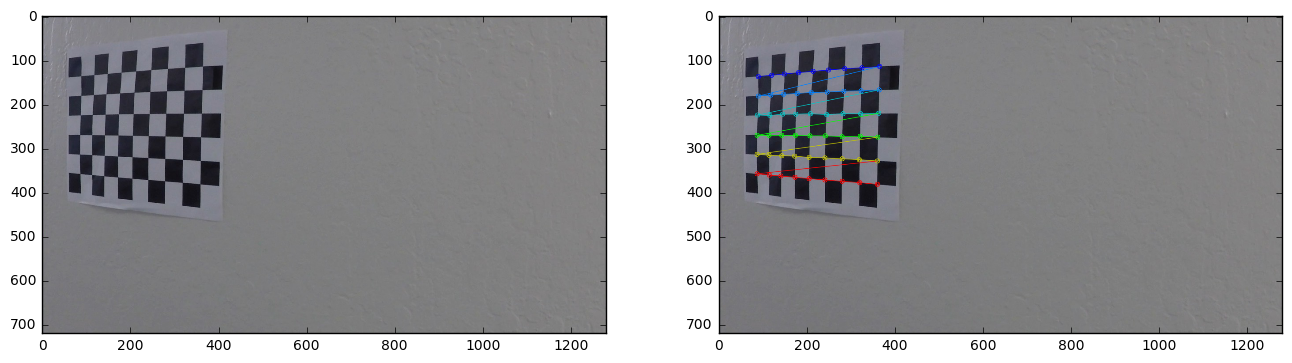

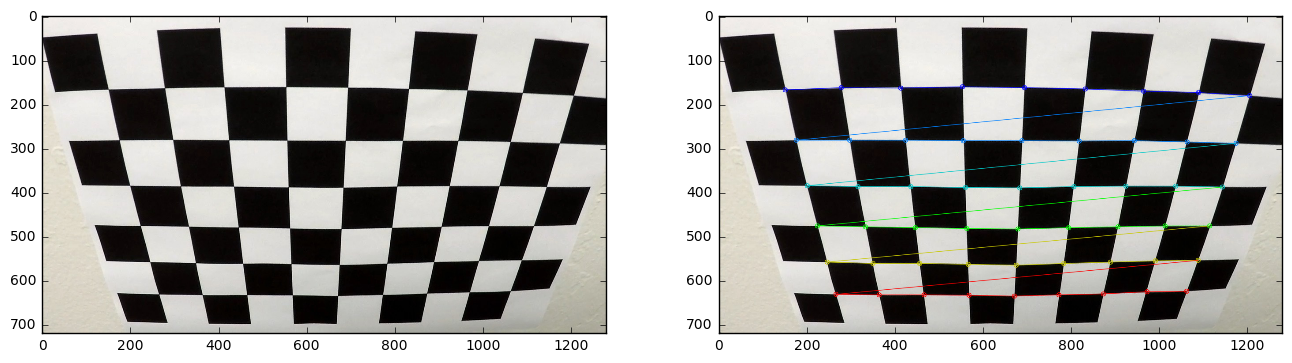

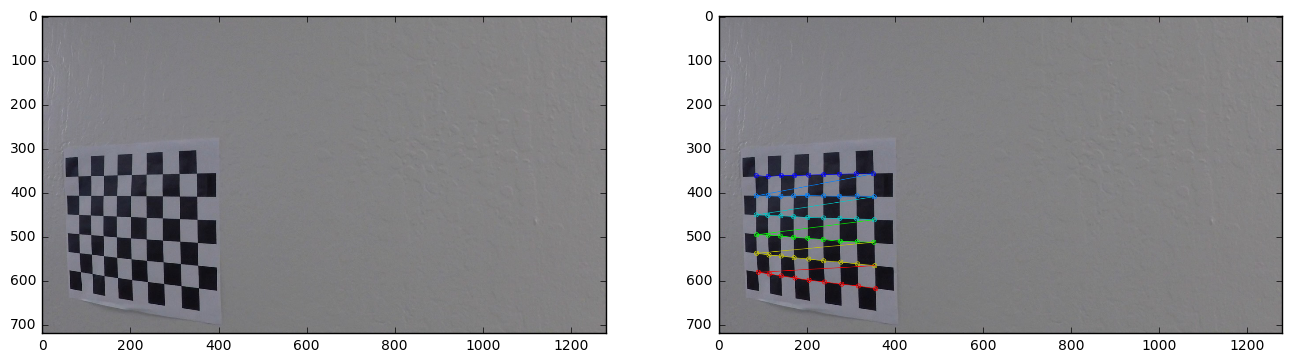

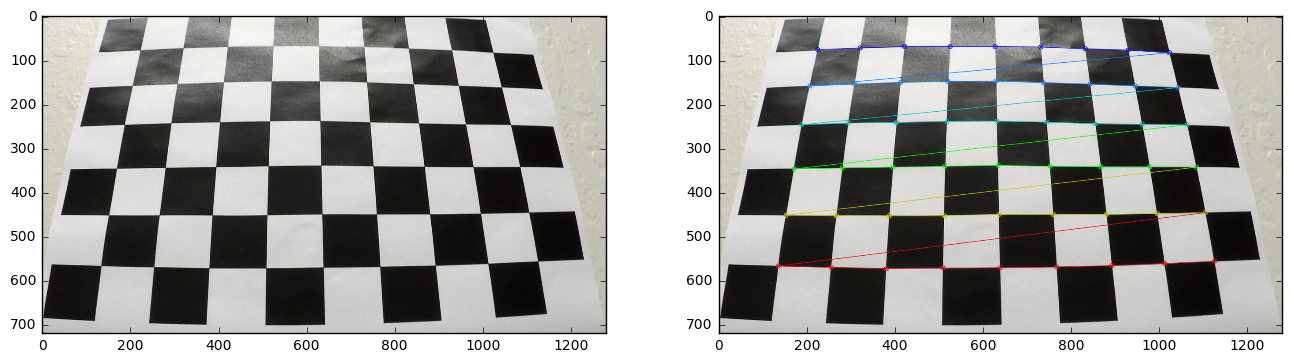

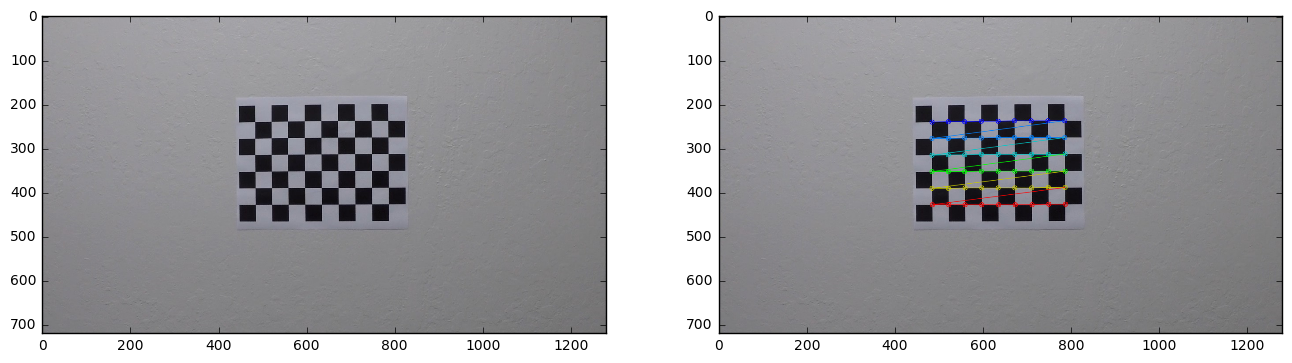

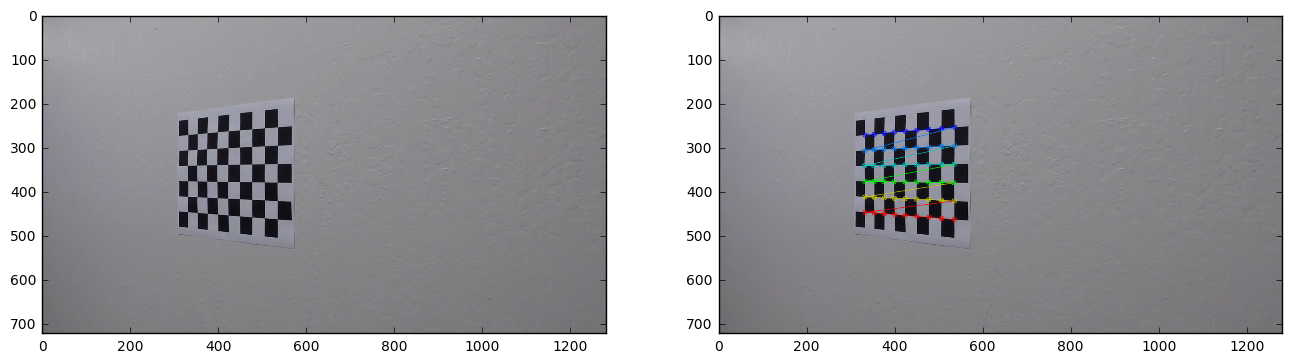

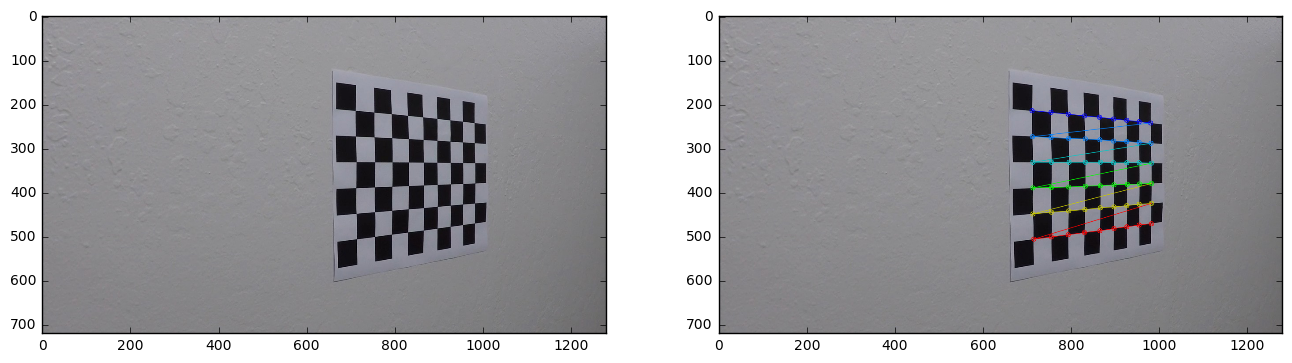

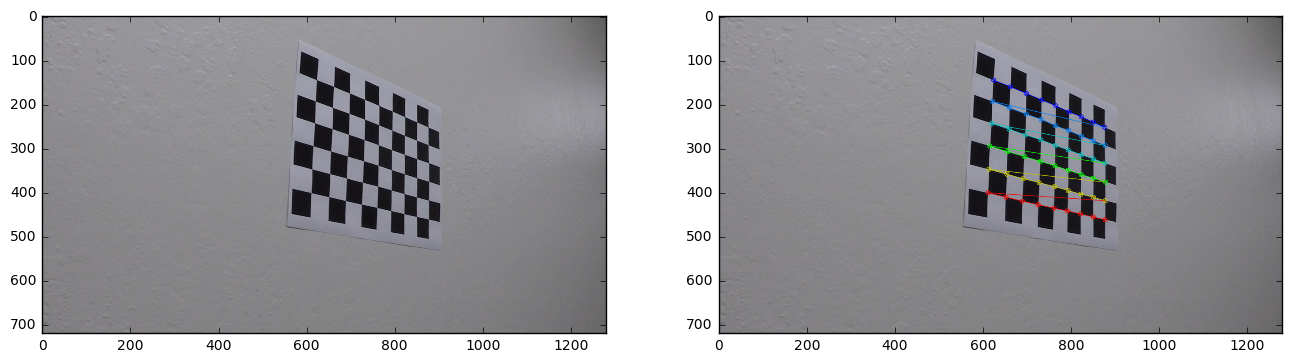

In [6]:
objpoints = []
imgpoints = []
ny = 6
nx = 9

objp = np.zeros((ny*nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

for calibrate in cal_images:
    img = mpimg.imread(calibrate)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        f, (ax1,ax2) = plt.subplots(1,2, figsize=(16,9))
        ax1.imshow(img)
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (nx, ny),corners, ret)
        ax2.imshow(img)
        plt.show()

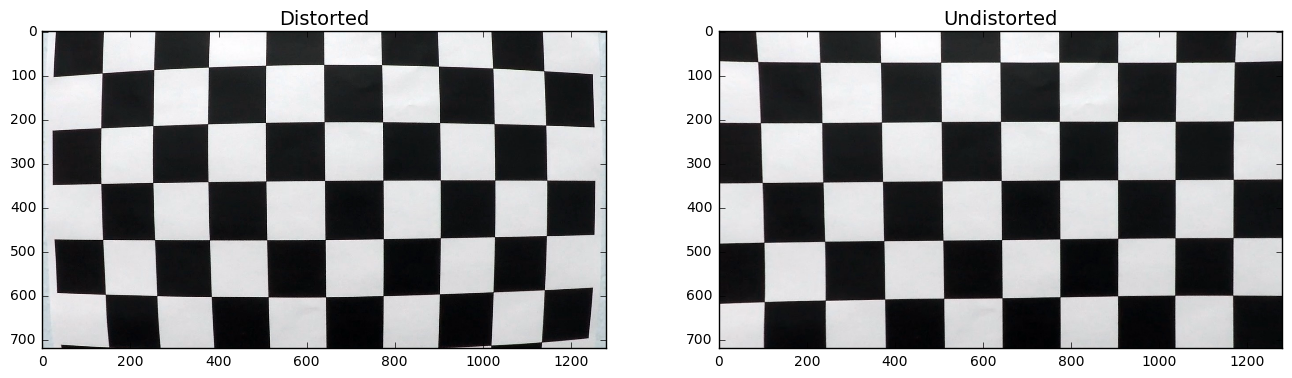

In [14]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

img = cv2.imread("calibration/calibration1.jpg")
dst = undistort(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
ax1.set_title("Distorted",fontsize=14)
ax1.imshow(img)
ax2.set_title("Undistorted",fontsize=14)
ax2.imshow(dst)
plt.show()